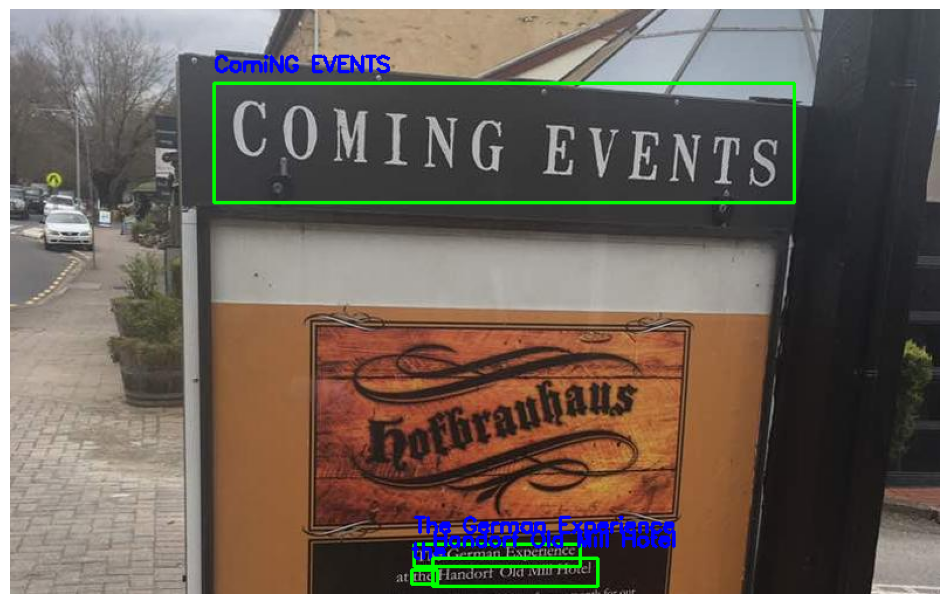

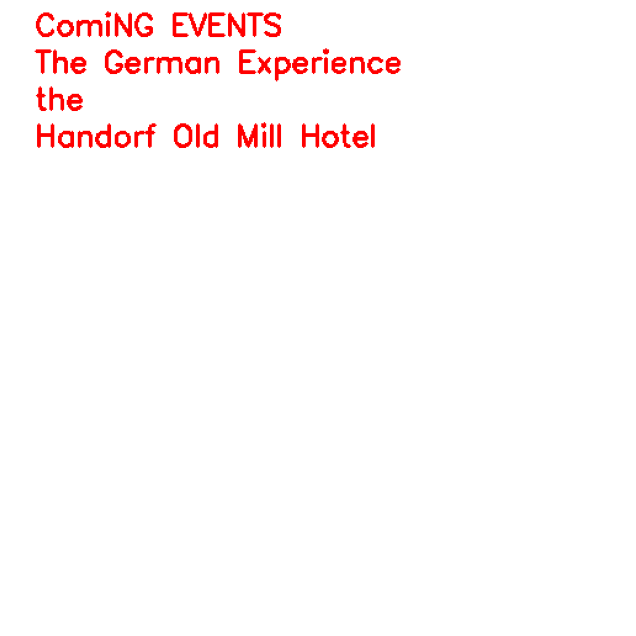

In [11]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

image_path = '/kaggle/input/text-recognition-total-text-dataset/totaltext/Images/Train/img1011.jpg'
img = cv2.imread(image_path)
reader = easyocr.Reader(['en'], gpu=False)
text_ = reader.readtext(img)
threshold = 0.25
annotated_img = img.copy()

detected_text = [t[1] for t in text_ if t[2] > threshold]

for t_ in text_:
    bbox, text, score = t_
    if score > threshold:
        cv2.rectangle(annotated_img, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0, 255, 0), 2)
        text_position = (int(bbox[0][0]), int(bbox[0][1]) - 10)
        cv2.putText(annotated_img, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

white_canvas = np.ones((500, 500, 3), dtype=np.uint8) * 255

y_position = 20
for text in detected_text:
    cv2.putText(white_canvas, text, (20, y_position), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    y_position += 30

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(white_canvas, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# for recognize specific font

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageFont, ImageDraw, Image

image_path = '/kaggle/input/text-recognition-total-text-dataset/totaltext/Images/Train/img1002.jpg'
img = cv2.imread(image_path)
reader = easyocr.Reader(['en'], gpu=False)
text_ = reader.readtext(img)
threshold = 0.25
annotated_img = img.copy()

detected_text = [t[1] for t in text_ if t[2] > threshold]

for t_ in text_:
    bbox, text, score = t_
    if score > threshold:
        cv2.rectangle(annotated_img, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0, 255, 0), 2)
        text_position = (int(bbox[0][0]), int(bbox[0][1]) - 10)
        cv2.putText(annotated_img, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

white_canvas = np.ones((800, 800, 3), dtype=np.uint8) * 255
white_canvas_pil = Image.fromarray(white_canvas)
draw = ImageDraw.Draw(white_canvas_pil)
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Path to your desired TTF font
font = ImageFont.truetype(font_path, 32)

y_position = 20
for text in detected_text:
    draw.text((20, y_position), text, font=font, fill=(255, 0, 0))
    y_position += 50

white_canvas = np.array(white_canvas_pil)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(white_canvas, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()